<center>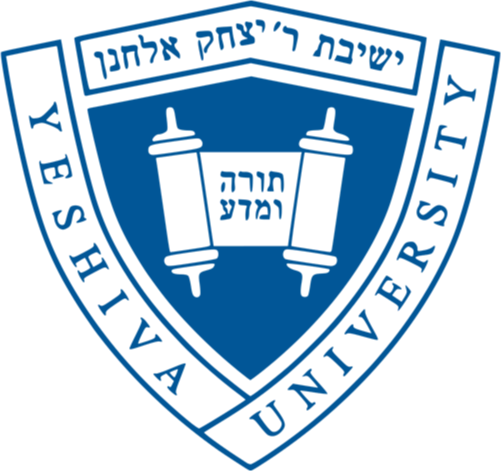</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5007 Neural Networks and Deep Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 02</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# 1. Read color image and show different channel

In [1]:
# Import some important packages here
import cv2 as cv
import numpy as np
import scipy.stats as ss
import skimage
from imgaug import augmenters as iaa

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(edgeitems=25, threshold=500, linewidth=500)

In [2]:
# Read color image
im_c = cv.imread('data/color.png')

In [3]:
# Separating Color channels
imR = im_c[:,:,2]
imG = im_c[:,:,1]
imB = im_c[:,:,0]

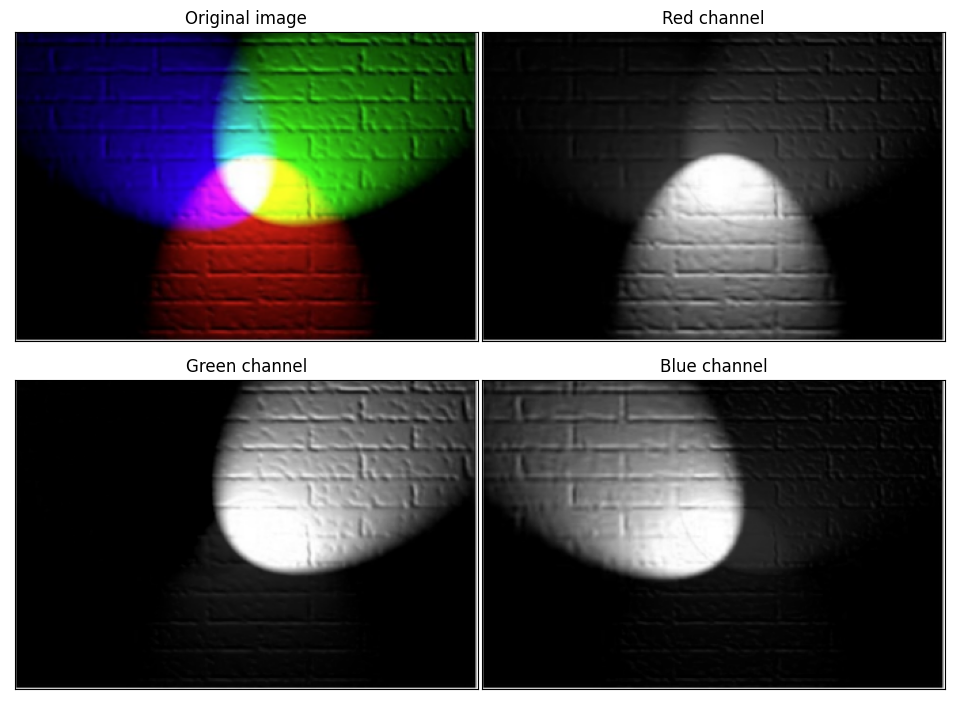

In [4]:
# Show images
images = [im_c, imR, imG, imB]
titles = ["Original image","Red channel","Green channel","Blue channel"]

plt.figure(figsize = (12, 9))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

plt.show()

# 2. Read bird image and convert it into binary image

In [5]:
# Read bird as grayscale image
im_bird_g = cv.imread('data/bird.png', 0) # 1/ -1: color mode; 0: gray mode

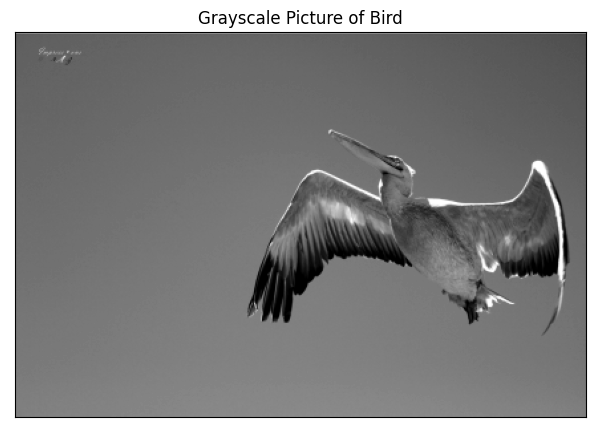

In [6]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(im_bird_g,'gray')
plt.title("Grayscale Picture of Bird")
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# Check the size of image
print(f'The hight length is {im_bird_g.shape[0]}')
print(f'The width length is {im_bird_g.shape[1]}')

The hight length is 290
The width length is 430


In [8]:
# Check maximum and minimum pixel number
print(f'The maximum  pixel number is {(im_bird_g[:]).max()}')
print(f'The minimum pixel number is {(im_bird_g[:]).min()}')

The maximum  pixel number is 255
The minimum pixel number is 0


In [9]:
# Image pixels
print(im_bird_g[100:120,50:190])

[[107 107 107 107 107 107 108 107 108 109 108 109 109 109 108 108 107 109 109 109 110 109 109 109 110 ... 116 116 115 116 115 116 115 117 114 116 116 116 115 116 115 116 117 116 117 117 116 117 116 116 117]
 [107 108 108 108 108 108 108 109 108 109 108 108 108 108 109 109 108 108 109 109 109 108 109 109 111 ... 117 114 116 116 114 114 115 116 116 116 117 117 117 115 116 117 116 116 117 117 117 117 118 118 117]
 [108 107 107 107 107 108 108 108 109 108 108 109 108 108 108 109 109 109 110 109 109 110 109 108 109 ... 116 115 115 116 116 116 116 116 117 117 117 118 118 117 117 118 117 116 116 117 116 117 117 116 117]
 [107 107 106 109 109 108 108 108 108 108 108 108 108 108 109 109 109 109 109 110 109 110 109 108 110 ... 117 116 115 116 115 117 116 116 116 117 116 117 117 116 116 117 118 117 117 117 116 116 117 117 116]
 [108 108 109 107 108 108 109 108 109 108 109 108 108 108 109 110 109 109 109 109 109 109 108 110 109 ... 116 116 116 116 116 117 114 117 117 116 115 115 117 114 116 117 11

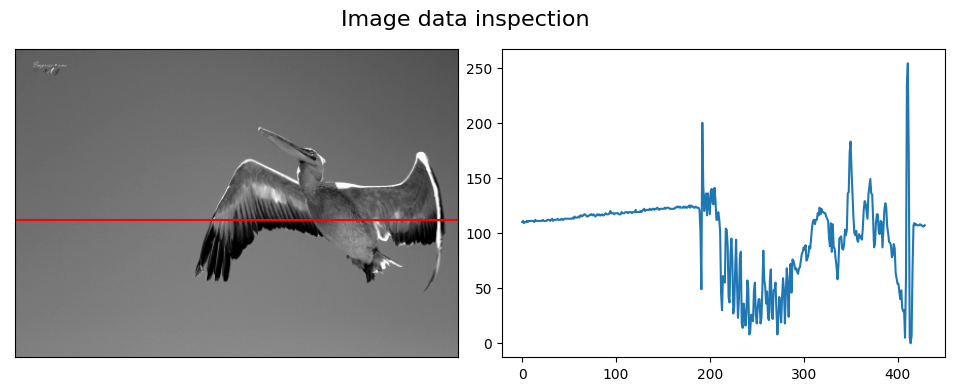

In [10]:
# Show one line
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_bird_g,'gray', aspect="auto")
plt.axhline(y = 160, color = 'r', linestyle = '-')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.plot(im_bird_g[160,:])


plt.subplots_adjust(wspace = 0.1)
plt.suptitle("Image data inspection", size=16)
plt.show()

In [11]:
# Apply thresholding to convert grayscale to binary image
ret, thresh = cv.threshold(im_bird_g, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

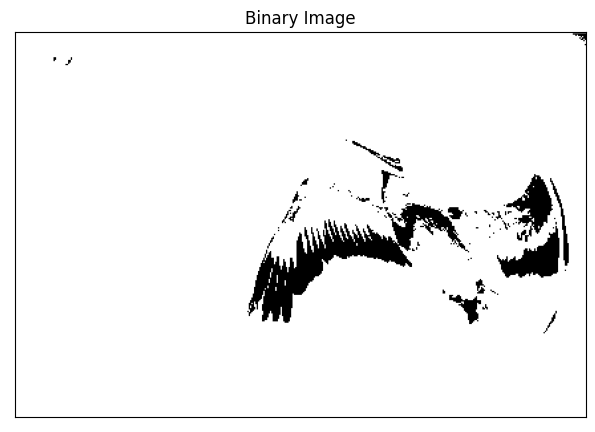

In [12]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(thresh,'gray')
plt.title("Binary Image")
plt.xticks([])
plt.yticks([])
plt.show()

# 3. Read eye image and crop it

In [13]:
# Read eye image
im_eye = cv.imread('data/eye.png')

In [14]:
# Resize / Change its dimensions
print('Resizing Image ... ')
resized_im_eye = cv.resize(im_eye, (480,320), interpolation = cv.INTER_AREA)

Resizing Image ... 


In [15]:
print('Image after resizing and keeping it in color')
[ row , col , dim ] = resized_im_eye.shape
print([ row , col , dim ])

Image after resizing and keeping it in color
[320, 480, 3]


In [16]:
# Cropping Image
cropped_im_eye = resized_im_eye[90:250, 80:300, :]

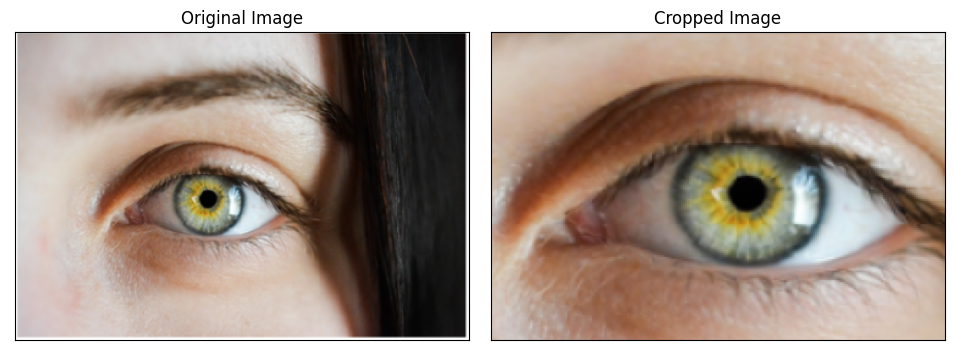

In [17]:
# Show images
images = [resized_im_eye, cropped_im_eye]
titles = ["Original Image","Cropped Image"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), aspect="auto")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 4. Read bird and cloud images and add them

In [18]:
# Read grayscale images
im_bird_g = cv.imread('data/bird.png', 0) # 1/ -1: color mode; 0: gray mode
im_cloud_g = cv.imread('data/cloud.png', 0) # 1/ -1: color mode; 0: gray mode

In [19]:
# Resize / Change its dimensions
resized_im_bird_g = cv.resize(im_bird_g, (480,320), interpolation = cv.INTER_AREA)
resized_im_cloud_g = cv.resize(im_cloud_g, (480,320), interpolation = cv.INTER_AREA)


In [20]:
# Addition of two images
summed_01 = cv.add(resized_im_cloud_g, resized_im_bird_g)
summed_02 = cv.add(resized_im_cloud_g/2, resized_im_bird_g/2)
summed_03 = cv.add(resized_im_cloud_g, resized_im_bird_g)/2

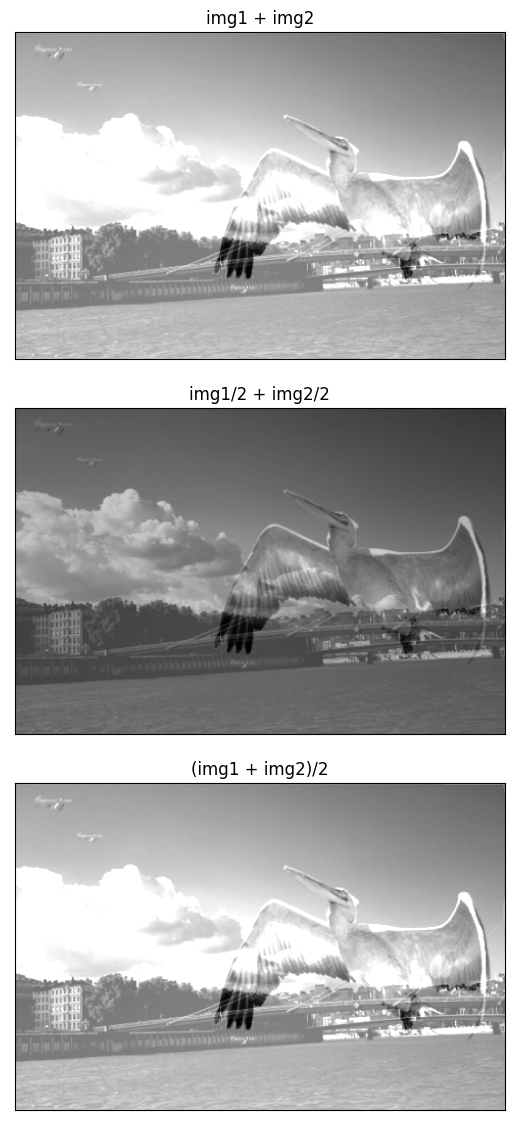

In [21]:
# Show images
images = [summed_01, summed_02, summed_03]
titles = ["img1 + img2","img1/2 + img2/2","(img1 + img2)/2"]

plt.figure(figsize = (24, 14))
for i in range(len(images)):
    plt.subplot(3, 1, i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(hspace = 0.15)

plt.show()

# 5. Read bird and cat images, then implement blendImg function 

In [22]:
# Read grayscale images
im_bird_g = cv.imread('data/bird.png', cv.IMREAD_GRAYSCALE)
im_cat_g = cv.imread('data/cat.png', cv.IMREAD_GRAYSCALE)

In [23]:
# Resize / Change its dimensions
resized_im_bird_g = cv.resize(im_bird_g, (480,320), interpolation = cv.INTER_AREA)
resized_im_cat_g = cv.resize(im_cat_g, (480,320), interpolation = cv.INTER_AREA)

In [24]:
# Blending two images
dst = cv.addWeighted(resized_im_bird_g, 0.9, resized_im_cat_g, 0.1, 0.0)

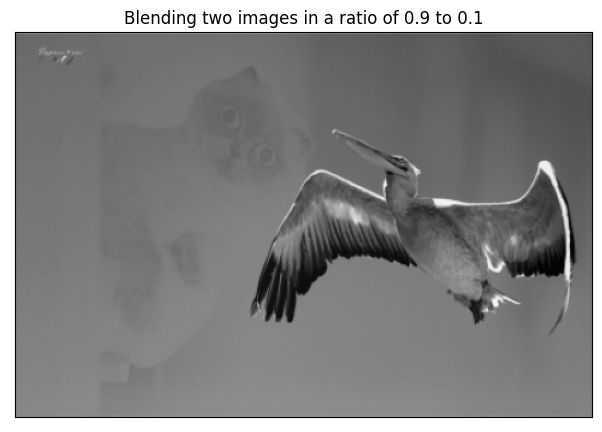

In [25]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(dst,'gray')
plt.title("Blending two images in a ratio of 0.9 to 0.1")
plt.xticks([])
plt.yticks([])
plt.show()

# 6. Read BM_lowCont image and plot the histogram and perform Equalization

In [26]:
# Read BM_lowCont as grayscale image
im_BM_lowCont_g = cv.imread('data/BM_lowCont.png', cv.IMREAD_GRAYSCALE)

In [27]:
# Resize / Change its dimensions
resized_im_BM_lowCont_g = cv.resize(im_BM_lowCont_g, (480,320), interpolation = cv.INTER_AREA)

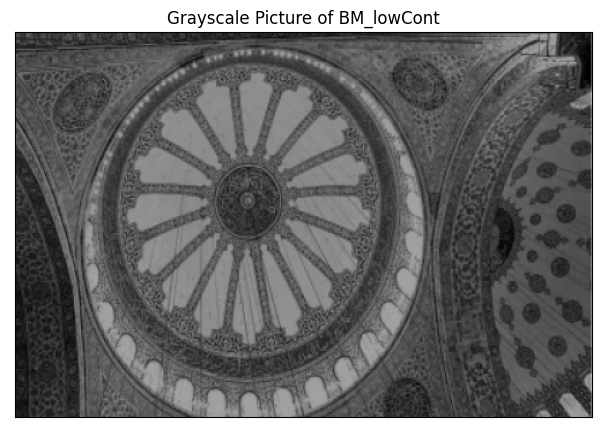

In [28]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(resized_im_BM_lowCont_g,'gray')
plt.title("Grayscale Picture of BM_lowCont")
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
# Image Histogram
resized_im_BM_lowCont_g_histogram = cv.calcHist([resized_im_BM_lowCont_g], [0], None, [256], [0, 256])

In [30]:
# Show images
images = [resized_im_BM_lowCont_g, resized_im_BM_lowCont_g_histogram]
titles = ["Low contrast Image","Histogram of Low contrast Image"]

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(images[0], cv.COLOR_BGR2RGB), aspect="auto")
plt.title(titles[0])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.plot(images[1], color='b')
plt.title(titles[1])
plt.subplots_adjust(wspace = 0.15)

plt.show()

In [31]:
# Image Histogram Equalization
J = cv.equalizeHist(resized_im_BM_lowCont_g)
J_histogram = cv.calcHist([J], [0], None, [256], [0, 256])

In [32]:
# Show images
images = [J, J_histogram]
titles = ["Histogram Equalized Image","Histogram of Equalized Image"]

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(images[0], cv.COLOR_BGR2RGB), aspect="auto")
plt.title(titles[0])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.plot(images[1], color='b')
plt.title(titles[1])
plt.subplots_adjust(wspace = 0.15)

plt.show()

In [33]:
# Transformation function
hist, bins = np.histogram(resized_im_BM_lowCont_g.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255/ cdf.max()

In [34]:
# Show images
plt.plot(cdf_normalized, color = 'b')
plt.title("Transformation Curve")
plt.grid()
plt.show()

# 7. Read bridge image and add salt & pepper noise

In [35]:
# Read bridge as grayscale image
im_bridge_g = cv.imread('data/bridge.png', 0)

In [36]:
# Salt and Pepper noise
aug = iaa.SaltAndPepper(p=0.02)
im_bridge_g_noisy_s_and_p = aug.augment_image(im_bridge_g)

In [37]:
# Show images
images = [im_bridge_g, im_bridge_g_noisy_s_and_p]
titles = ["Original Image","Salt & Pepper Noise Image"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

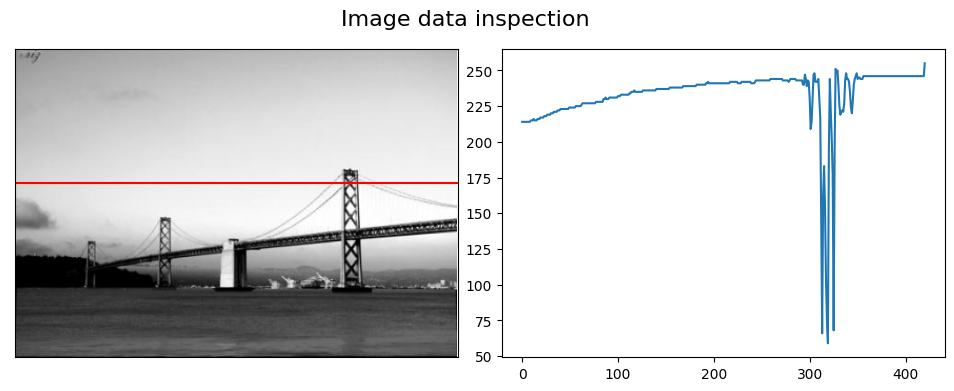

In [38]:
# Show one line
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_bridge_g,'gray', aspect="auto")
plt.axhline(y = 120, color = 'r', linestyle = '-')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.plot(im_bridge_g[120,:])


plt.subplots_adjust(wspace = 0.1)
plt.suptitle("Image data inspection", size = 16)
plt.show()

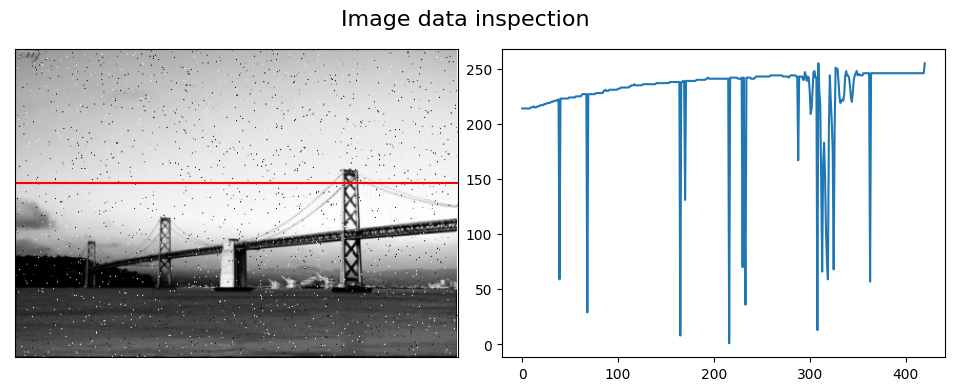

In [39]:
# Show one line
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_bridge_g_noisy_s_and_p,'gray', aspect="auto")
plt.axhline(y = 120, color = 'r', linestyle = '-')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.plot(im_bridge_g_noisy_s_and_p[120,:])


plt.subplots_adjust(wspace = 0.1)
plt.suptitle("Image data inspection", size = 16)
plt.show()

# 8. Plot Gaussian function

In [40]:
# Normally distributed random numbers with 0 mean and 1 SD.
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, 100_000)
[n, x] = np.histogram(noise, np.linspace( -3 , 3, 31))
t = np.linspace( -3 , 3, 30)

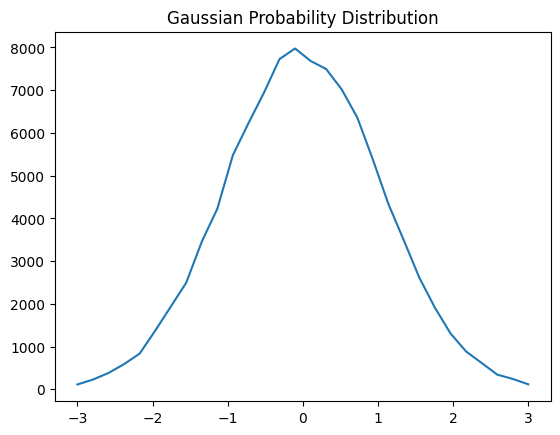

In [41]:
plt.plot(t, n)
plt.title("Gaussian Probability Distribution")
plt.show()

# 9. Add random and Gaussian noise

In [42]:
# Read bridge as grayscale image
im_bridge_g = cv.imread('data/bridge.png', 0)

In [43]:
# Gaussian white noise with mean m=0
row, col = im_bridge_g.shape
mean = 0.0
var = 0.01
sigma = np.sqrt(var)
gauss_noise = np.random.normal(loc=mean, scale=sigma, size=(row,col))*255
im_bridge_g_noisy_gauss = np.clip(im_bridge_g + gauss_noise, 0, 255).astype('uint8')

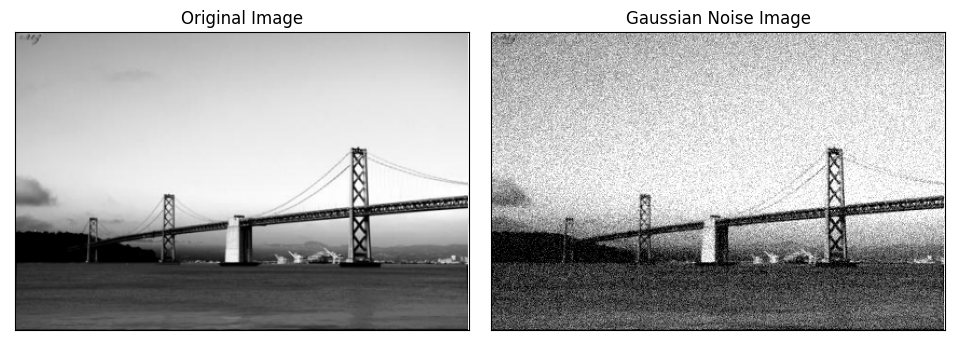

In [44]:
# Show images
images = [im_bridge_g, im_bridge_g_noisy_gauss]
titles = ["Original Image","Gaussian Noise Image"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

In [45]:
# Add random noise
# Noise image with m x n
# image is in Uint8
sigma = 0.3
randomNoise = (np.random.uniform(0, 1, size=im_bridge_g.shape) * sigma * 255).astype('uint8')

In [46]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(randomNoise,'gray')
plt.title("Random noise")
plt.xticks([])
plt.yticks([])
plt.show()

In [47]:
# Add Image and noise image
noisyImg = cv.add(im_bridge_g, randomNoise)

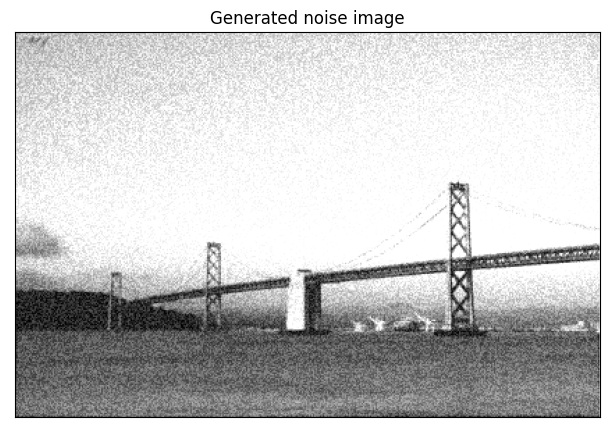

In [48]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(noisyImg,'gray')
plt.title("Generated noise image")
plt.xticks([])
plt.yticks([])
plt.show()

# References

- Histograms - 2: Histogram Equalization : https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

- Impulse, gaussian and salt and pepper noise with OpenCV : https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv

- What replaces scipy.misc.bytescale? : https://stackoverflow.com/questions/58811889/what-replaces-scipy-misc-bytescale